# COVID-19 Vaccine Analysis

## by Justin Sierchio

In this analysis, we will be looking at the COVID-19 vaccination data. We hope to answer some of the following questions:

<ul>
    <li>Which countries are ramping up their vaccine efforts the fastest?</li>
    <li>Where are vaccines lagging behind?</li>
    <li>Are there any other observations we can make from this dataset</li>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/gpreda/covid-world-vaccination-progress/download. More information related to the dataset can be found at: https://www.kaggle.com/gpreda/covid-world-vaccination-progress.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_COVID19 = pd.read_csv("country_vaccinations.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from COVID-19 Vaccine dataset
df_COVID19.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


Before beginning our data cleaning, let's explain what each of the columns represents:

<ul>
    <li>country - the country for which vaccination information is provided</li>
    <li>iso_code - the ISO code the country</li>
    <li>date - the date for the last entry</li>
    <li>total_vaccinations - the absolute number of total immunizations in the country</li>
    <li>people_vaccinated - the number of people vaccinated</li>
    <li>People_fully_vaccinated - the number of people who have received the entire set of immunizations required by the specific scheme (in most cases 2)</li>
    <li>daily_vaccinations_raw - the number of vaccinations for that date and country</li>
    <li>total_vaccinations_per_hundred - ratio (%) between population immunized and total population of the country</li>
    <li>people_vaccinations_per_hundred - ratio (%) between people vaccination and total population of the country</li>
    <li>people_fully_vaccinated_per_hundred - ratio (%) between people fully vaccinated and total country population</li>
    <li>daily_vaccinations_per_million - ratio (ppm) between vaccination number and total population for current date in the country</li>
    <li>vaccines - vaccines available in the country</li>
    <li>source_name - source of the information (national authority, international organization, local organization etc.)</li>
    <li>source_website - website of the source of information</li>
</ul>

## Data Cleaning

Let's first get a sense of what the dataset looks like.

In [4]:
df_COVID19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1816 non-null   object 
 1   iso_code                             1622 non-null   object 
 2   date                                 1816 non-null   object 
 3   total_vaccinations                   1221 non-null   float64
 4   people_vaccinated                    948 non-null    float64
 5   people_fully_vaccinated              468 non-null    float64
 6   daily_vaccinations_raw               1002 non-null   float64
 7   daily_vaccinations                   1748 non-null   float64
 8   total_vaccinations_per_hundred       1221 non-null   float64
 9   people_vaccinated_per_hundred        948 non-null    float64
 10  people_fully_vaccinated_per_hundred  468 non-null    float64
 11  daily_vaccinations_per_million

Let's look at the number of 'Nan' and 'null' values.

In [5]:
df_COVID19.isna().sum()

country                                   0
iso_code                                194
date                                      0
total_vaccinations                      595
people_vaccinated                       868
people_fully_vaccinated                1348
daily_vaccinations_raw                  814
daily_vaccinations                       68
total_vaccinations_per_hundred          595
people_vaccinated_per_hundred           868
people_fully_vaccinated_per_hundred    1348
daily_vaccinations_per_million           68
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Let's convert all the 'NaN' and 'null' values to 0 to make the analysis easier.

In [6]:
# Fill all 'Nan' and 'null' values with 0
df_COVID19['iso_code'].fillna(0, inplace = True)
df_COVID19['total_vaccinations'].fillna(0, inplace = True)
df_COVID19['people_vaccinated'].fillna(0, inplace = True)
df_COVID19['people_fully_vaccinated'].fillna(0, inplace = True)
df_COVID19['daily_vaccinations_raw'].fillna(0, inplace = True)
df_COVID19['daily_vaccinations'].fillna(0, inplace = True)
df_COVID19['total_vaccinations_per_hundred'].fillna(0, inplace = True)
df_COVID19['people_vaccinated_per_hundred'].fillna(0, inplace = True)
df_COVID19['people_fully_vaccinated_per_hundred'].fillna(0, inplace = True)
df_COVID19['daily_vaccinations_per_million'].fillna(0, inplace = True)

# Check the data values
df_COVID19.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

At this juncture, let's select the columns we believe we will need going forward.

In [7]:
# Feature Selection for States' Dataset
df_COVID19 = df_COVID19[['country', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
                        'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 
                        'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
                        'daily_vaccinations_per_million', 'vaccines']]

Let's organize the data so that the latest information is shown first.

In [8]:
# Reorder columns so that date is the first column
df_COVID19 = df_COVID19.reindex(columns=['date', 'country', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
                        'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 
                        'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
                        'daily_vaccinations_per_million', 'vaccines'])

# Resort data by date
df_COVID19['date'] = pd.to_datetime(df_COVID19['date'])
df_COVID19.sort_values(by=['date'], inplace=True, ascending=False)
df_COVID19.reset_index();

# Display result
df_COVID19.head(10)

,date,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
247,2021-01-30,Chile,67123.0,56771.0,10352.0,8.0,455.0,0.35,0.30,0.05,24.0,Pfizer/BioNTech
1658,2021-01-30,Turkey,1960860.0,0.0,0.0,32509.0,104854.0,2.32,0.00,0.00,1243.0,Sinovac
563,2021-01-30,Finland,162277.0,144520.0,17757.0,10487.0,9222.0,2.93,2.61,0.32,1664.0,Pfizer/BioNTech
863,2021-01-30,Israel,4734007.0,3005382.0,1728625.0,76596.0,172807.0,54.69,34.72,19.97,19965.0,"Moderna, Pfizer/BioNTech"
32,2021-01-30,Argentina,366384.0,281023.0,85361.0,22350.0,11189.0,0.81,0.62,0.19,248.0,Sputnik V
1684,2021-01-30,United Arab Emirates,3114167.0,2864167.0,250000.0,107561.0,98196.0,31.49,28.96,2.53,9928.0,"Pfizer/BioNTech, Sinopharm"
1095,2021-01-30,Netherlands,226298.0,0.0,0.0,10800.0,12213.0,1.32,0.00,0.00,713.0,"Moderna, Pfizer/BioNTech"
820,2021-01-30,Isle of Man,7220.0,6106.0,1030.0,361.0,484.0,8.49,7.18,1.21,5692.0,Pfizer/BioNTech
187,2021-01-30,Bulgaria,41020.0,27957.0,13063.0,215.0,2129.0,0.59,0.40,0.19,306.0,"Moderna, Pfizer/BioNTech"
1568,2021-01-30,Sri Lanka,37825.0,0.0,0.0,32539.0,18912.0,0.18,0.00,0.00,883.0,Oxford/AstraZeneca


Now let's create a separate variable to keep the latest set of vaccine data by date for future analysis.

In [9]:
# Look at the latest set of death totals for each state and territory
df_COVID19_latest = df_COVID19.drop_duplicates(subset=['country'], keep='first')
df_COVID19_latest;

# Sort the cumulative death data by largest to smallest
df_COVID19_latest.sort_values(by=['country'])

,date,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
32,2021-01-30,Argentina,366384.0,281023.0,85361.0,22350.0,11189.0,0.81,0.62,0.19,248.0,Sputnik V
53,2021-01-30,Austria,197179.0,183628.0,13551.0,15760.0,8690.0,2.19,2.04,0.15,965.0,Pfizer/BioNTech
92,2021-01-30,Bahrain,170433.0,170433.0,0.0,623.0,2199.0,10.02,10.02,0.00,1292.0,"Pfizer/BioNTech, Sinopharm"
125,2021-01-29,Belgium,283584.0,270740.0,12844.0,7964.0,8775.0,2.45,2.34,0.11,757.0,"Moderna, Pfizer/BioNTech"
139,2021-01-23,Bermuda,2932.0,0.0,0.0,0.0,181.0,4.71,0.00,0.00,2907.0,Pfizer/BioNTech
...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2021-01-30,Turkey,1960860.0,0.0,0.0,32509.0,104854.0,2.32,0.00,0.00,1243.0,Sinovac
1684,2021-01-30,United Arab Emirates,3114167.0,2864167.0,250000.0,107561.0,98196.0,31.49,28.96,2.53,9928.0,"Pfizer/BioNTech, Sinopharm"
1725,2021-01-29,United Kingdom,8859372.0,8378940.0,480432.0,489934.0,361343.0,13.05,12.34,0.71,5323.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1767,2021-01-30,United States,29577902.0,24064165.0,5259693.0,1693241.0,1291416.0,8.94,7.27,1.59,3902.0,"Moderna, Pfizer/BioNTech"


## Exploratory Data Analysis

Let's begin our exploratory analysis by looking at the top 20 countries (relative to population) for vaccinating their populations (as of the latest date in our dataset).

In [13]:
# Find the top 20 countries for vaccinating their populations (as of the latest date in our dataset)
df_COVID19_latest1 = df_COVID19_latest[['country', 'people_vaccinated_per_hundred']];
df_COVID19_latest1_sort = df_COVID19_latest1.sort_values(by=['people_vaccinated_per_hundred'], ascending=False)
print('Top 20 Countries by Total Vaccinations (per 100 population)\n')
print(df_COVID19_latest1_sort.head(20))

Top 20 Countries by Total Vaccinations (per 100 population)

                   country  people_vaccinated_per_hundred
651              Gibraltar                          38.19
863                 Israel                          34.72
1684  United Arab Emirates                          28.96
498                England                          12.89
1725        United Kingdom                          12.34
1815                 Wales                          12.00
1152      Northern Ireland                          10.78
92                 Bahrain                          10.02
1425              Scotland                           9.95
1767         United States                           7.27
820            Isle of Man                           7.18
1031                 Malta                           5.18
449                Denmark                           3.20
747                Iceland                           3.14
810                Ireland                           2.99
968        

As we can see from this dataset, most of the countries are in Europe, with the English-speaking countries toward the top. 

Let's see how many countries have actually begun vaccination programs. (as defined by people vaccinated per 100 population).

In [33]:
# Find the number of countries with nonzero people vaccinated per 100 population
df_COVID19_latest1.astype(bool).sum(axis=0)

country                          64
people_vaccinated_per_hundred    44
dtype: int64

So from our result, we see that of the countries with active vaccination programs, roughly 2/3rds have nonzero populations with vaccinations.

Now let's look at the rate of vaccinations (i.e. by daily vaccinations per 1 million people).

In [39]:
# Find the top 20 countries for vaccinating their populations (as of the latest date in our dataset)
df_COVID19_latest2 = df_COVID19_latest[['country', 'daily_vaccinations_per_million']];
df_COVID19_latest2_sort = df_COVID19_latest2.sort_values(by=['daily_vaccinations_per_million'], ascending=False)
print('Top 20 Countries by Total Vaccinations (per 100 population)\n')
print(df_COVID19_latest2_sort.head(20))

Top 20 Countries by Total Vaccinations (per 100 population)

                   country  daily_vaccinations_per_million
1468            Seychelles                         20297.0
863                 Israel                         19965.0
651              Gibraltar                         16918.0
1684  United Arab Emirates                          9928.0
1447                Serbia                          6530.0
1815                 Wales                          6250.0
820            Isle of Man                          5692.0
498                England                          5521.0
1725        United Kingdom                          5323.0
1425              Scotland                          4318.0
1767         United States                          3902.0
747                Iceland                          3900.0
1152      Northern Ireland                          3861.0
1104       Northern Cyprus                          3739.0
139                Bermuda                          29

Not surprisingly, many of the same countries that have the highest population-weighted vaccination rates also have the highest daily number of vaccinations per million people.

A little closer to home, let us look at the situation in the United States.

In [53]:
# Set up dataset for United States vaccination data
df_COVID19_USA = df_COVID19.loc[df_COVID19['country'] == 'United States']
df_COVID19_USA.head(5)

,date,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
1767,2021-01-30,United States,29577902.0,24064165.0,5259693.0,1693241.0,1291416.0,8.94,7.27,1.59,3902.0,"Moderna, Pfizer/BioNTech"
1766,2021-01-29,United States,27884661.0,22858318.0,4780888.0,1690979.0,1253815.0,8.42,6.91,1.44,3788.0,"Moderna, Pfizer/BioNTech"
1765,2021-01-28,United States,26193682.0,21698606.0,4263056.0,1541048.0,1235330.0,7.91,6.56,1.29,3732.0,"Moderna, Pfizer/BioNTech"
1764,2021-01-27,United States,24652634.0,20687970.0,3801053.0,1111640.0,1161050.0,7.45,6.25,1.15,3508.0,"Moderna, Pfizer/BioNTech"
1763,2021-01-26,United States,23540994.0,19902237.0,3481921.0,806751.0,1119058.0,7.11,6.01,1.05,3381.0,"Moderna, Pfizer/BioNTech"


Let's begin by plotting the people fully vaccinated per hundred people.

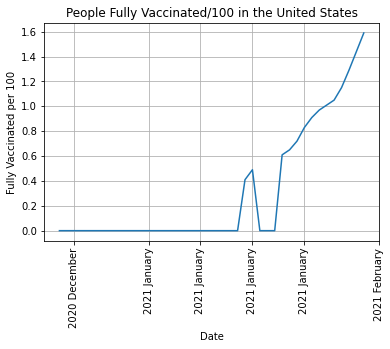

In [62]:
# Plot the number of fully vaccinated people per hundred in the United States

# Import needed library
import matplotlib.dates as mdates

# Create the axes
x = df_COVID19_USA['date']
y = df_COVID19_USA['people_fully_vaccinated_per_hundred']

# Create the plot and format the dates
fig,ax1 = plt.subplots()
plt.plot(x,y)
monthyearFmt = mdates.DateFormatter('%Y %B')
ax1.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

# Display the plot
plt.grid()
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated per 100')
plt.title('People Fully Vaccinated/100 in the United States')
plt.show()

As we can see, there has been an exponential increase in the numbers of people fully vaccinated in the United States since vaccination data began being collected in December 2020.